# MACHINE LEARNING PIPELINE FOR SOURCE 1

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from xgboost.sklearn import XGBClassifier

In [19]:
df= pd.read_csv("StressLevelDataset.csv")

In [20]:
#Splitting the data into features and target variable
X= df.drop("stress_level", axis = 1)
y= df["stress_level"]

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

#Feature Scaling
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [21]:
#Model Training
#Logistic Regression
log_clf = LogisticRegression(max_iter= 200)
log_clf.fit(X_train_scaled, y_train)
#Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators= 200, random_state= 42)
rf_clf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
#PREDICTIONS
y_pred_log= log_clf.predict(X_test_scaled)
rf_pred = rf_clf.predict(X_test)

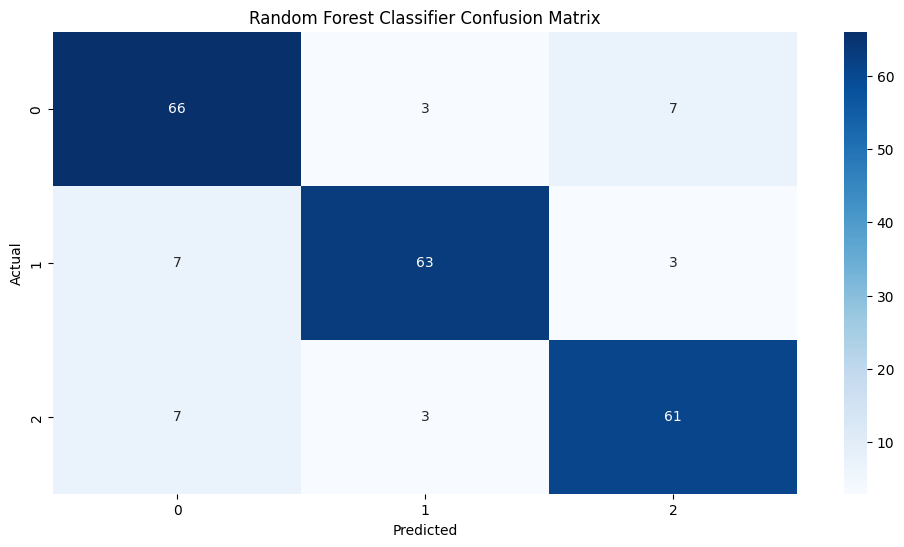

In [ ]:
#Confusion Matrix  for Random Forest Classifier
plt.figure(figsize=(12, 6))
cm= confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues')
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()


In [24]:
#Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        76
           1       0.88      0.88      0.88        73
           2       0.91      0.90      0.91        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



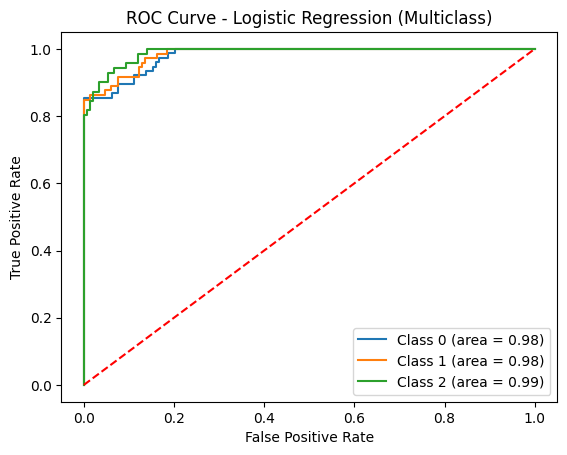

In [31]:
#ROC CURVE for Logistic Regression
'''
plt.figure(figsize=(10, 6))
y_prob_log= log_clf.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _= roc_curve(y_test, y_prob_log)
roc_auc= auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, color='blue', label='Logistic Regression ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

'''

classes = np.unique(y)
y_test_binarized = label_binarize(y_test, classes=classes)
y_prob_log = log_clf.predict_proba(X_test_scaled)
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_log[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class {} (area = {:.2f})'.format(class_label, roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Multiclass)')
plt.legend(loc='lower right')
plt.show()



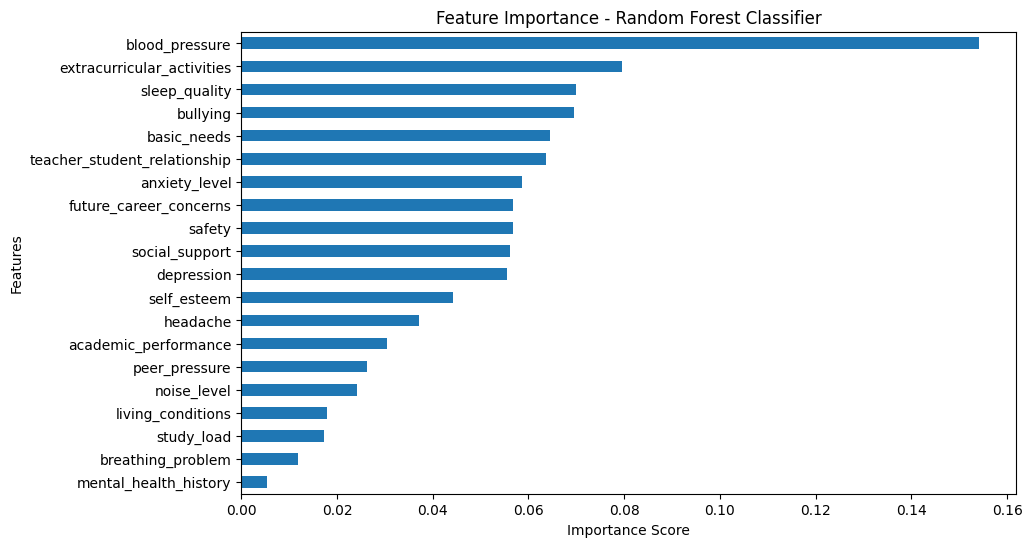

In [28]:
#feature Importance for Random Forest Classifier
importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance - Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [30]:
results= pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest Classifier"],
    "Accuracy": [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, rf_pred)],
    "F1 Score": [f1_score(y_test, y_pred_log, average='weighted'), f1_score(y_test, rf_pred, average='weighted')]
})
print(results)

                      Model  Accuracy  F1 Score
0       Logistic Regression  0.881818  0.881921
1  Random Forest Classifier  0.863636  0.864011
